# Project Goals, Data, Methods, and Results.
In this notebook you will find my data cleaning, organiztion, and results for the Capstone Project.

In essence I like to keep things as straight forward as possiable. My goal here is to demostrate that I understand the data and that I am confident in making relevant connections. 

I decided that a simple and very relevant business recommendation is what day of the week a movie should be released. Why is this important? Money, more specifically when it comes to box office sales/revenue. 

When it comes to products, be it a pair of shoes, watch, or in this case a Movie, I want to release these products on the day that the yields the most money. 

Therefore, based on this goal I will go through the data and search for the desired day of the week that shows most box office sales. Very simple and straight forward. 

# Side Note:
After Concluding that friday is the best day to release a movie so that the company makes the most money, I continued to explore the data. This was purely out of curiosity.

In [1]:
# starting with significant imports 
import pandas as pd
import numpy as np
import datetime 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
import scipy.stats
import scipy.optimize
import scipy.spatial
from IPython import display
from ipywidgets import interact, widgets

import re
import mailbox
import csv
import seaborn as sns
from pandas import Series, DataFrame

In [3]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Load data
movie_info = pd.read_csv('../../../data/rt.movie_info.tsv', sep="\t")
movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [5]:
# Basic info in the data
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [6]:
# making the box office data type a float and getting rid of the commas
movie_info['box_office'] = pd.to_numeric(movie_info['box_office'].str.replace(',', ''))

In [7]:
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1560 non-null   int64  
 1   synopsis      1498 non-null   object 
 2   rating        1557 non-null   object 
 3   genre         1552 non-null   object 
 4   director      1361 non-null   object 
 5   writer        1111 non-null   object 
 6   theater_date  1201 non-null   object 
 7   dvd_date      1201 non-null   object 
 8   currency      340 non-null    object 
 9   box_office    340 non-null    float64
 10  runtime       1530 non-null   object 
 11  studio        494 non-null    object 
dtypes: float64(1), int64(1), object(10)
memory usage: 146.4+ KB


In [8]:
# checking my dataframe to see how everything is looking
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [9]:
# turning the theater_date column into a datetime object
movie_info['theater_date'] = pd.to_datetime(movie_info['theater_date'], format='%b %d, %Y')

In [10]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN


In [11]:
# i confirm that the dates are a datetime object
movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            1560 non-null   int64         
 1   synopsis      1498 non-null   object        
 2   rating        1557 non-null   object        
 3   genre         1552 non-null   object        
 4   director      1361 non-null   object        
 5   writer        1111 non-null   object        
 6   theater_date  1201 non-null   datetime64[ns]
 7   dvd_date      1201 non-null   object        
 8   currency      340 non-null    object        
 9   box_office    340 non-null    float64       
 10  runtime       1530 non-null   object        
 11  studio        494 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(9)
memory usage: 146.4+ KB


In [12]:
# now i can use the datetime methods to my advantage.
movie_info['theater_date'].dt.day_name()

0       Saturday
1         Friday
2         Friday
3         Friday
4            NaN
          ...   
1555      Friday
1556      Friday
1557      Monday
1558    Thursday
1559    Thursday
Name: theater_date, Length: 1560, dtype: object

In [13]:
# now i can create another column so that i can refrence what day the movies came out.
# i can simply make a column with these days
movie_info['day_of_week'] = movie_info['theater_date'].dt.day_name()

In [14]:
movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,day_of_week
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,1971-10-09,"Sep 25, 2001",NaN,NaN,104 minutes,NaN,Saturday
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,2012-08-17,"Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,Friday
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,1996-09-13,"Apr 18, 2000",NaN,NaN,116 minutes,NaN,Friday
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,1994-12-09,"Aug 27, 1997",NaN,NaN,128 minutes,NaN,Friday
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaT,NaN,NaN,NaN,200 minutes,NaN,NaN


In [15]:
movie_info['day_of_week'].value_counts()

Friday       702
Wednesday    169
Thursday      95
Saturday      76
Monday        60
Tuesday       53
Sunday        46
Name: day_of_week, dtype: int64

In [16]:
# i want to view the earliest date in this data and max
movie_info['theater_date'].min()

Timestamp('1921-01-01 00:00:00')

In [17]:
movie_info['theater_date'].max()

Timestamp('2018-10-19 00:00:00')

In [18]:
# i can also subtract dates in order to view the time between those two dates
# this is called time delta
movie_info['theater_date'].max() - movie_info['theater_date'].min()

# pretty cool to see how many days are between 1921 and 2018!

Timedelta('35720 days 00:00:00')

In [19]:
# dropping null values in te box office column
movie_info = movie_info.dropna(subset=['box_office'])

In [20]:
# making sure the nulls are gone
movie_info['box_office'].isnull().sum()

0

In [21]:
# starting a new dataframe with the columns i want to further inspect
new_subset = movie_info[['theater_date', 'box_office', 'day_of_week']]

In [22]:
# resetting the index
new_subset.reset_index(drop=True, inplace=True)

In [23]:
new_subset.head(10)

,theater_date,box_office,day_of_week
0,2012-08-17,600000.0,Friday
1,2002-01-11,41032915.0,Friday
2,2006-04-27,224114.0,Thursday
3,2010-06-30,134904.0,Wednesday
4,2010-12-17,1039869.0,Friday
5,2013-12-20,99165609.0,Friday
6,2013-12-25,20518224.0,Wednesday
7,2004-05-14,1971135.0,Friday
8,2003-09-19,312136.0,Friday
9,2003-05-16,201010.0,Friday


In [24]:
# inspecting the null values that i have.
new_subset.isnull().sum()

theater_date    6
box_office      0
day_of_week     6
dtype: int64

In [25]:
# dropping nulls
new_subset = new_subset.dropna(subset=['theater_date'])

In [26]:
new_subset = new_subset.dropna(subset=['day_of_week'])

In [27]:
# double checking for nulls.
new_subset.isnull().sum()

theater_date    0
box_office      0
day_of_week     0
dtype: int64

In [28]:
final_subset = new_subset[['theater_date', 'box_office', 'day_of_week']]
final_subset.sort_values(['box_office', 'day_of_week'], inplace=True)

In [34]:
# up to this point i have made a tidy table. but in doing so i have created some redundancy.
# i can see that the day name appear in multiple rows.
final_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 205 to 169
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   theater_date  334 non-null    datetime64[ns]
 1   box_office    334 non-null    float64       
 2   day_of_week   334 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.4+ KB


In [36]:
# a way to remove this redundancy is to create a separate table with days data and linking it to the box office using-
# an index. this is called data normalization.
days = final_subset[['day_of_week', 'box_office']].drop_duplicates()
days.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331 entries, 205 to 169
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day_of_week  331 non-null    object 
 1   box_office   331 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.8+ KB


In [37]:
days.head()

,day_of_week,box_office
id,,
205,Friday,363.0
76,Friday,2367.0
145,Friday,3328.0
143,Wednesday,8300.0
278,Friday,8856.0


In [39]:
# since the index is unique i need to carry it explicitly as a column.
# i will reset the index and rename it id
days.index.name = 'id'
my_id = days.reset_index()
my_id.head(15)

,id,day_of_week,box_office
0,205,Friday,363.0
1,76,Friday,2367.0
2,145,Friday,3328.0
3,143,Wednesday,8300.0
4,278,Friday,8856.0
5,298,Friday,16632.0
6,101,Friday,22099.0
7,137,Wednesday,25658.0
8,180,Friday,35966.0
9,127,Friday,39712.0


In [41]:
pd.merge(my_id, days, on=['day_of_week', 'box_office']).head()

,id,day_of_week,box_office
0,205,Friday,363.0
1,76,Friday,2367.0
2,145,Friday,3328.0
3,143,Wednesday,8300.0
4,278,Friday,8856.0


In [40]:
# # i will do a merge between the my_id and the final dataframe
# pd.merge(my_id, final_subset, on=['day_of_week', 'box_office']).head()

,id,day_of_week,box_office,theater_date
0,205,Friday,363.0,2009-08-28
1,76,Friday,2367.0,2010-07-30
2,145,Friday,3328.0,2013-11-22
3,143,Wednesday,8300.0,1974-12-25
4,278,Friday,8856.0,2011-08-26


In [42]:
# heres a simplified table
tidy = pd.merge(my_id, days, on=['day_of_week', 'box_office'])
tidy.head(15)

,id,day_of_week,box_office
0,205,Friday,363.0
1,76,Friday,2367.0
2,145,Friday,3328.0
3,143,Wednesday,8300.0
4,278,Friday,8856.0
5,298,Friday,16632.0
6,101,Friday,22099.0
7,137,Wednesday,25658.0
8,180,Friday,35966.0
9,127,Friday,39712.0


In [43]:
# making a data frame with only friday as my week day
friday_df = tidy[(tidy['day_of_week'] == 'Friday')]
friday_df.box_office.median()

13942558.5

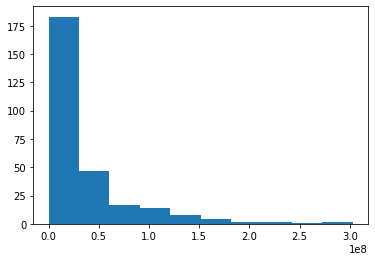

In [44]:
# histogram distribution of bax office revenue for Friday
fig, ax = plt.subplots()

ax.hist(friday_df['box_office']);

<function matplotlib.pyplot.show(close=None, block=None)>

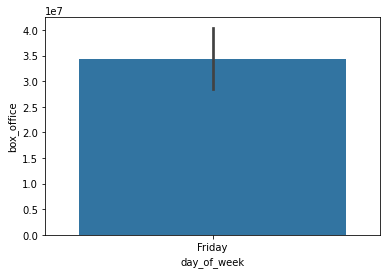

In [45]:
sns.barplot(x='day_of_week', y='box_office', data=friday_df)
plt.show

In [46]:
# making a data frame with the rest of week days
not_friday_df = tidy[(tidy['day_of_week'] != 'Friday')]
# not_friday_df.day_of_week.unique()
not_friday_df.box_office.median()

22877808.0

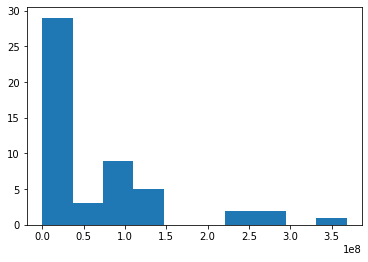

In [47]:
# histogram distribution of bax office revenue for Friday
fig, ax = plt.subplots()

ax.hist(not_friday_df['box_office']);

<function matplotlib.pyplot.show(close=None, block=None)>

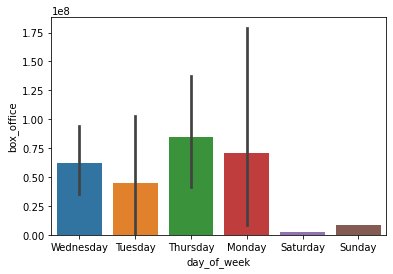

In [48]:
# plotting the rest of the days of the week
sns.barplot(x='day_of_week', y='box_office', data=not_friday_df)
plt.show

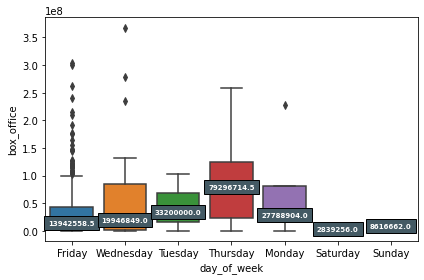

In [49]:
# this box plot has shown me that friday is the hottest day to release a movie based upon

box_plot = sns.boxplot(x="day_of_week", y="box_office", data=tidy)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=7,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

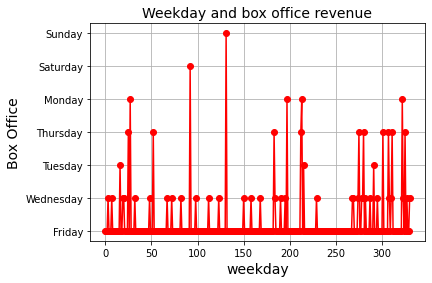

In [50]:
# trying out a line chart on the same results
plt.plot(tidy['day_of_week'], color='red', marker='o')
plt.title('Weekday and box office revenue', fontsize=14)
plt.xlabel('weekday', fontsize=14)
plt.ylabel('Box Office', fontsize=14)
plt.grid(True)
plt.show()

# Findings:
Based on my findings on box office revenue and day of the week that the movie was released, Friday is the hottest day to release a movie. Since the majority of the movies come out on Friday, the biggest yield in box office revenue is Friday.

These findings are important because a company like Computing Vision, that is starting off in the movie industry should maximize those box office sales.

# Further Analysis of The Findings.
This section details my analysis to see what else i can derive. 

I mainly used pandas query method together with some seaborn and matplotlib. I was curious to see how incorporating different sorting and filtering techniques help with the acquisition of new findings. 

This proved to be somewhat useful. 

In [ ]:
# using the pandas query function to take advantage of the ability to use SQL like queries.
tidy.query('(box_office > 88800000) and (day_of_week in ["Friday"])')

In [ ]:
# created a filter like variable to get the median for the dataframe
# it also describes the data
# boxoffice_median = tidy.box_office.describe().median()
boxoffice_median = tidy.box_office.median()
boxoffice_median

In [ ]:
# now i can filter the dataframe amd find the medians values-
# by calling the variable above with the '@' in front of the variable name.
tidy.query('box_office  >= @boxoffice_median')

In [ ]:
# i can further apply this filter to run more descriptive queries on the data
monday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Monday"])')
# monday.describe()
monday.box_office.sum()

In [ ]:
tuesday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Tuesday"])')
tuesday.describe()

# tuesday.box_office.sum()

In [ ]:
wednesday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Wednesday"])')
# wednesday.describe()
wednesday

In [ ]:
thursday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Thursday"])')
# thursday.describe()
thursday

In [ ]:
# By far friday has the highest count for movies being released in the week!
friday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Friday"])')
# friday.describe()
friday.box_office.sum()

In [ ]:
# since there is only one value for saturday i get nothing here
saturday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Saturday"])')
saturday.describe()

In [ ]:
tidy.query('day_of_week == "Saturday"')

In [ ]:
# same applies to sunday
sunday = tidy.query('(box_office > @boxoffice_median) and (day_of_week in ["Sunday"])')
sunday.describe()

In [ ]:
tidy.query('day_of_week == "Sunday"')

In [ ]:
# using the agg function to get the mean and median for my box office column
tidy_2 = tidy.groupby("day_of_week").agg({"box_office": ["mean", "median"]})

In [ ]:
tidy_2.sort_values('day_of_week', ascending=True, inplace=True)

In [ ]:
tidy_2.head(10)

In [ ]:
tidy_2.box_office['median']

In [ ]:
tidy_2.box_office.plot.bar('median')

In [ ]:
# bar chart to see the visualization for median box office revenue by day
tidy_2.box_office['median'].plot.barh(stacked=False, title='Box office revenue by Day',color=('DarkBlue','c'), figsize=(15, 10));

In [ ]:
# bar chart to see the visualization for mean box office revenue by day
tidy_2.box_office['mean'].plot.barh(stacked=False, title='Box office vs Day of the week',color=('DarkBlue','c'), figsize=(15, 10));

In [ ]:
tidy.plot.scatter('day_of_week', 'box_office')

# From this point on, this is strictly for my own curiosity
I wanted to challenge myself

In [ ]:
# the data seems to say that Wednesday will be the best day to relase a movie
tidy.day_of_week.value_counts(normalize=True)

In [ ]:
# this function will take the actual fraction of days for Wednesday and the number 
def sample(wednesday, n=1000):
    return pd.DataFrame({'day_of_week': np.where(np.random.rand(n) < wednesday,'Wednesday', 'Friday')})

In [ ]:
#  lets see a possiable sample and the counts for the two days
s = sample(0.095,n=1000)

In [ ]:
s.day_of_week.value_counts(normalize=True)
# in this case Wednesday is actually under the level of Friday

In [ ]:
# i will repeat this many times and collect the results in the Dataframe
# 1000 simulations should be sufficient
dist = pd.DataFrame([sample(0.095).day_of_week.value_counts(normalize=True) for i in range(1000)])

In [ ]:
dist.head()

In [ ]:
# lets look at the data in a histogram 
dist.Wednesday.hist(histtype='step', bins=20)

# it turns out that for a true Wednesday fraction of 0.095,i may obtain any sample proportion from .08 to .0.11
# the converse must also be true so that 0.095 may actually originate from a Friday majority. 

# Can i make this more precise, and identify a likely range of True fractions? 

 The confidence interval describes the uncertainty of inference by giving me a range such that saying 95% of the times, -
 the range would include the True value.

 95% is the confidence level, and i can choose it as i want.
 95% of the times means that if i were to make calculate in and compute a confidence interval for each day,
 then for approximately 95 of those 100, the intervals would include a True value.

In [ ]:
# here is another function that helps me compute the interval
def samplingdist(wednesday, n=1000):
    return pd.DataFrame([sample(wednesday,n).day_of_week.value_counts(normalize=True) for i in range(1000)])

In [ ]:
# lets say that i want to go for the 95% confidence interval.
# this will lay between the 2.5% quantile, and the 97.5% quantile. 

# so i look for the True fraction for which a measured value of 0.095 lies at the 2.5% quantile, 
# and the True fraction for which my measured value lies at the 97.5% quantile. 
# it turns out that those two fractions are the edges of the confidence interval.

# i will make a function  that extracts those quantiles
def quantiles(wednesday, n=1000):
    dist = samplingdist(wednesday, n)
    return dist.Wednesday.quantile(0.025), dist.Wednesday.quantile(0.975)

In [ ]:
# let me explore a few values until i find 0.095 on each end.
quantiles(0.090)

In [ ]:
quantiles(0.094)

In [ ]:
quantiles(0.099)

In [ ]:
quantiles(0.092)

In [ ]:
# for the observed sample of 0.095, when the sample size is 1000, the 95 confidence interval for the True population-
# function is 0.094 to 0.092

dist = samplingdist(0.094, 10000)

In [ ]:
dist.Wednesday.hist(histtype='step')

# i can see that this margin of error is now more like 1%, which would have been sufficient to claim Wednesday as the likely-
# best day to release a movie.

# Python Stats
There is in fact a close relationship between hypothesis testing and confidence intervals.

If the null hypothesis corresponds to a range of values for a population parameter that are excluuded from the confidence interval, then the null hypothesis must be rejected with a very low P value. 

The lower, the higher the confidence level of the interval.

I will go back and use the polls example and reformulate it as a hypithesis test. 

In [ ]:
# as a remider, Wednesday was the best day to release a movie.
# so here the null hypothesis will be that Friday is the best day.

# so the true Wednesday fraction would be 0.095 or less.
# i need to find out wether a Wednesday proportion of 0.095 is an extreme result if the null hypothesis holds.
tidy.day_of_week.value_counts(normalize=True)

In [ ]:
# i will compute the sampling distribution of the proportion and get a true Wednesday fraction of-
# 0.095
# if its lower than that, the P-value will be even lower. 

# heres a function to simulate the sample of a 1000:
# once again, i use numpy random rand and compare uniformly distributed numbers between zero and one-
# with the Wednesday fraction. i use numpy where if the condition holds true or Friday otherwise. enclose everything in-
# a dataframe. return the value.

def sample(wednesday, n=1000):
    return pd.DataFrame({'day_of_week': np.where(np.random.rand(n) < wednesday, 'Wednesday', 'Friday')})

In [ ]:
# here is the sampling distribution.
# i call sample, grab the day_of_week and count them, and then repeat. 
# collect the results in a list comprehension. and then enclose in a dataframe

dist = pd.DataFrame({'Wednesday': [sample(0.095,1000).day_of_week.value_counts(normalize=True)['Wednesday'] for i in range(10000)]})

In [ ]:
# histogram the samling distribution and see that indeed 0.095 is not a very extreme value.
dist.Wednesday.hist(histtype='step', bins=20)

In [ ]:
# if i look for its quantile
scipy.stats.percentileofscore(dist.Wednesday,0.095)

In [ ]:
# i see that the corresponding P-value is 49%.
# certainly not enough to reject the null hypothesis that Friday ties or wins for best day
100 - scipy.stats.percentileofscore(dist.Wednesday,0.095)

In [ ]:
# what about for Frida? 
# here it makes more sense to set the null hypothesis to Wednesday winning or tying, since Friday seems to have the mayority.

# in fact, a nice feature of binary problems, such as this, is that the null hypothesis and its alternative are-
# complementary.

# again, i will compute the sampling distribution at the fraction of 0.095, this time for Friday.
dist = pd.DataFrame({'Friday': [sample(0.095,10000).day_of_week.value_counts(normalize=True)['Friday'] for i in range(1000)]})

In [ ]:
# i will overlay Wednesday value of 0.095
# here, the value is so extreme that its not even included in my finite sampling distribution. 

# i conclude that the P value for rejecting the null hypothesis that Wednesday wins or ties for best day is 1 over 1000- 
# or less.
# which qualifies as very significant

dist.Friday.hist(histtype='step', bins=10)
# plt.axvline(0.095, c='C1')